In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# Models libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [3]:
# Evaluation Metric Libraries
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, accuracy_score, precision_score, recall_score,f1_score, roc_auc_score

In [4]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

In [5]:
payment_df1 = pd.read_csv('C:/Users/dines/Downloads/PS_20174392719_1491204439457_log.csv')

In [6]:
payment_df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:
payment_df1.shape

(660051, 11)

In [8]:
payment_df1.tail(10)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
660041,35,CASH_IN,168556.97,C1197102870,30000.0,198556.97,C647381922,2359751.35,2191194.38,0,0
660042,35,CASH_IN,223656.42,C1001270326,57522.0,281178.42,C696339741,417969.72,257447.72,0,0
660043,35,PAYMENT,28856.50,C243934994,149165.0,120308.50,M7605820,0.00,0.00,0,0
660044,35,CASH_IN,328874.95,C352525251,179614.0,508488.95,C1453070531,769279.33,440404.39,0,0
660045,35,CASH_OUT,220525.75,C1602636489,20920.0,0.00,C1758265849,8029812.80,8250338.55,0,0
660046,35,PAYMENT,13183.15,C15418524,0.0,0.00,M550420307,0.00,0.00,0,0
660047,35,CASH_OUT,72247.97,C756970890,20477.0,0.00,C1278353600,0.00,72247.97,0,0
660048,35,TRANSFER,951791.53,C1084469986,0.0,0.00,C238360573,1013204.41,1964995.94,0,0
660049,35,CASH_OUT,194813.24,C448184782,73109.0,0.00,C1552603831,2166917.99,2361731.22,0,0
660050,35,CASH_OUT,107318.76,C1331155436,429631.0,322312.24,C2067298957,56159.94,163478.71,0,0


In [9]:
payment_df1.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [10]:
if payment_df1.isnull().values.any():
    data.dropna(inplace=True)
else:
    print("There aren't any missing values in the dataset")

There aren't any missing values in the dataset


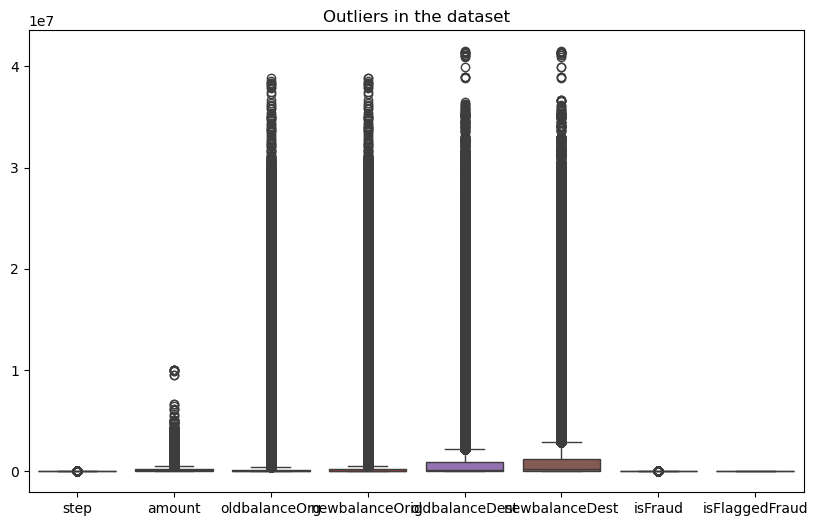

In [11]:
plt.figure(figsize=(10,6))
sns.boxplot(data = payment_df1)
plt.title("Outliers in the dataset")
plt.show()

In [12]:
payment_df1['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [13]:
payment_df1['type'].value_counts()

type
CASH_OUT    234546
PAYMENT     222753
CASH_IN     143777
TRANSFER     54122
DEBIT         4853
Name: count, dtype: int64

Text(0, 0.5, 'Counts')

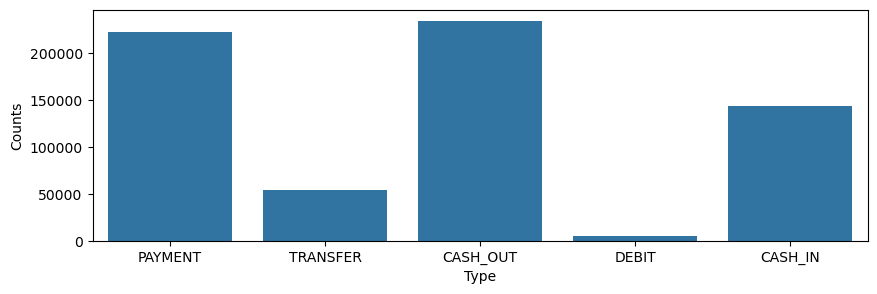

In [14]:
plt.figure(figsize=(10,3))
sns.countplot(data = payment_df1, x = 'type')
plt.xlabel('Type')
plt.ylabel('Counts')

In [15]:
# Type column encoding
payment_df1['type'] = payment_df1['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4})

C:\Users\dines\AppData\Local\Temp\ipykernel_11420\1962555048.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  payment_df1['type'] = payment_df1['type'].replace({'CASH_OUT':0, 'PAYMENT':1, 'CASH_IN':2, 'TRANSFER':3, 'DEBIT':4})


In [16]:
payment_df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,3,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,0,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [17]:
payment_df1['isFraud'].unique()

array([0, 1], dtype=int64)

In [18]:
payment_df1['isFraud'].value_counts()

isFraud
0    659653
1       398
Name: count, dtype: int64

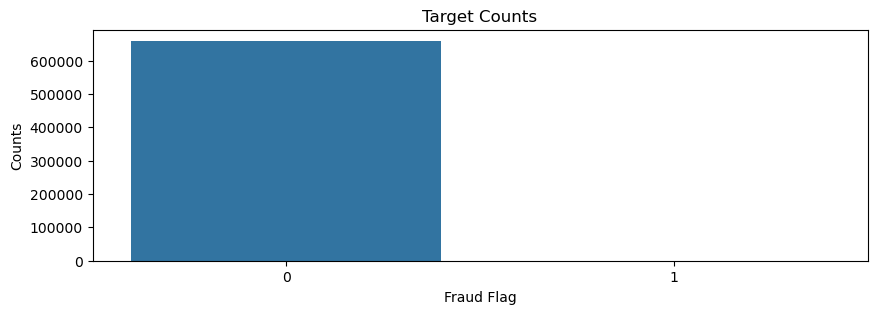

In [19]:
plt.figure(figsize=(10,3))
sns.countplot(data = payment_df1, x = 'isFraud')
plt.title('Target Counts')
plt.xlabel('Fraud Flag')
plt.ylabel('Counts')
plt.show()

In [20]:
numeric_df = payment_df1.select_dtypes(include = ['number'])
numeric_df.corr()

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
step,1.000000,-0.001375,-0.009700,-0.007011,-0.006412,0.006152,-0.012415,0.002003,NaN
type,-0.001375,1.000000,0.280922,0.263568,0.273652,0.059535,0.063540,0.010158,NaN
amount,-0.009700,0.280922,1.000000,-0.004471,-0.006838,0.215734,0.317960,0.068555,NaN
oldbalanceOrg,-0.007011,0.263568,-0.004471,1.000000,0.999196,0.093826,0.064179,0.000494,NaN
newbalanceOrig,-0.006412,0.273652,-0.006838,0.999196,1.000000,0.095554,0.063836,-0.007112,NaN
oldbalanceDest,0.006152,0.059535,0.215734,0.093826,0.095554,1.000000,0.972227,-0.005636,NaN
newbalanceDest,-0.012415,0.063540,0.317960,0.064179,0.063836,0.972227,1.000000,-0.001550,NaN
isFraud,0.002003,0.010158,0.068555,0.000494,-0.007112,-0.005636,-0.001550,1.000000,NaN
isFlaggedFraud,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


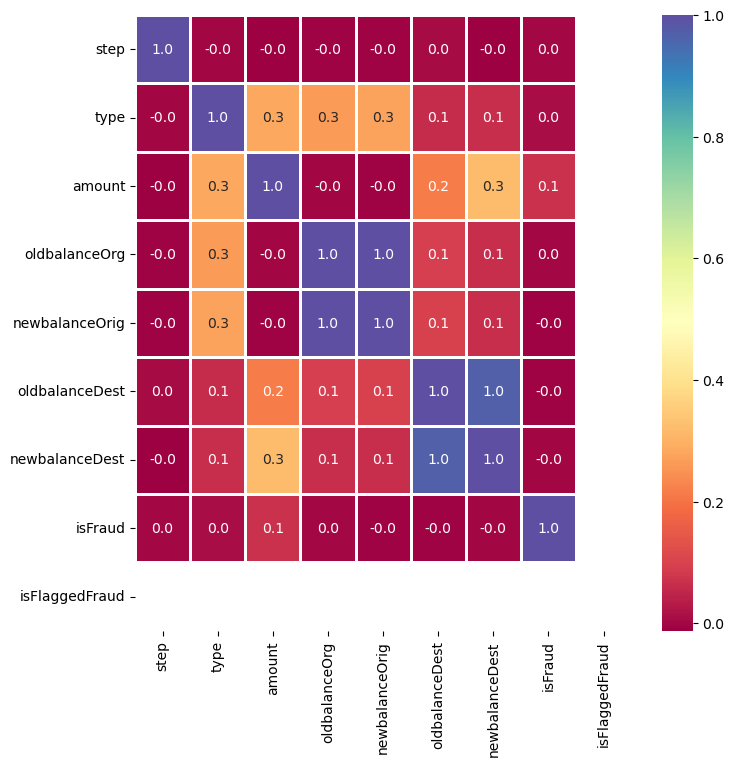

In [21]:
# Correlation graph
plt.figure(figsize=(8,8))
sns.heatmap(numeric_df.corr(), annot=True, linewidths = 0.9, fmt = ".1f", cmap = 'Spectral' )
plt.show()

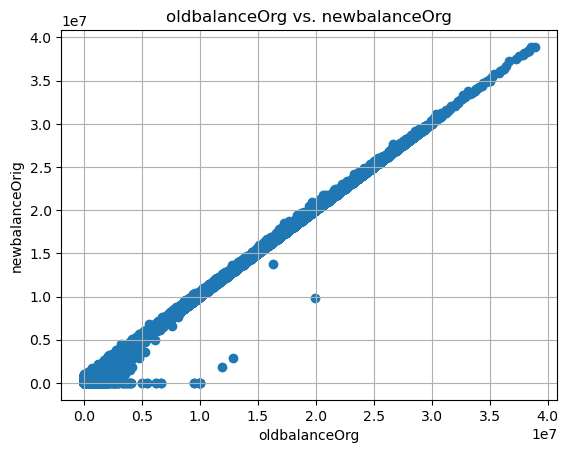

In [22]:
# Correlation between oldbalanceOrg and newbalanceOrig
plt.scatter(payment_df1['oldbalanceOrg'], payment_df1['newbalanceOrig'], label = 'Data')
plt.xlabel('oldbalanceOrg')
plt.ylabel('newbalanceOrig')
plt.title('oldbalanceOrg vs. newbalanceOrg' )
plt.grid()
plt.show()

In [23]:
# Dropping unnecessary columns after analysis
payment_df1.drop(['isFlaggedFraud', 'step','nameOrig', 'nameDest'], axis=1, inplace = True)

In [24]:
# Removing duplicates
payment_df1.drop_duplicates(inplace = True)

In [25]:
payment_df1.columns
payment_df1.shape

(658941, 7)

In [26]:
payment_df1.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0
2,3,181.00,181.0,0.00,0.0,0.0,1
3,0,181.00,181.0,0.00,21182.0,0.0,1
4,1,11668.14,41554.0,29885.86,0.0,0.0,0


In [27]:
payment_df1.describe().T

,count,mean,std,min,25%,50%,75%,max
type,658941.0,1.048614e+00,9.831576e-01,0.0,0.00,1.00,2.00,4.0
amount,658941.0,1.630697e+05,2.718720e+05,0.1,12619.99,77275.07,217216.51,10000000.0
oldbalanceOrg,658941.0,8.866492e+05,2.957920e+06,0.0,0.00,17622.00,154278.52,38900000.0
newbalanceOrig,658941.0,9.067760e+05,2.994927e+06,0.0,0.00,0.00,194525.37,38900000.0
oldbalanceDest,658941.0,9.781822e+05,2.320335e+06,0.0,0.00,117555.40,899260.46,41500000.0
newbalanceDest,658941.0,1.139123e+06,2.471860e+06,0.0,0.00,212257.37,1176660.93,41500000.0
isFraud,658941.0,6.039994e-04,2.456900e-02,0.0,0.00,0.00,0.00,1.0


In [28]:
# Select relevant features for the model
col_select = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
X = payment_df1[col_select]
print('X shape is:', X.shape)

y = payment_df1['isFraud']
print('y shape is:',y.shape)

X shape is: (658941, 5)
y shape is: (658941,)


In [29]:
# Partitioning / Train Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state = 42)
print('X_train shape is:', X_train.shape)
print('X_test shape is:', X_test.shape)
print('y_train shape is:', y_train.shape)
print('y_test shape is:', y_test.shape)



X_train shape is: (527152, 5)
X_test shape is: (131789, 5)
y_train shape is: (527152,)
y_test shape is: (131789,)


In [30]:
# Data scaling
scaler = StandardScaler()
#scaler.fit(X_train)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [31]:
# Polynomial Features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

Lasso MSE: 0.0005921271785325306, Lasso R2: 0.023959404018333075


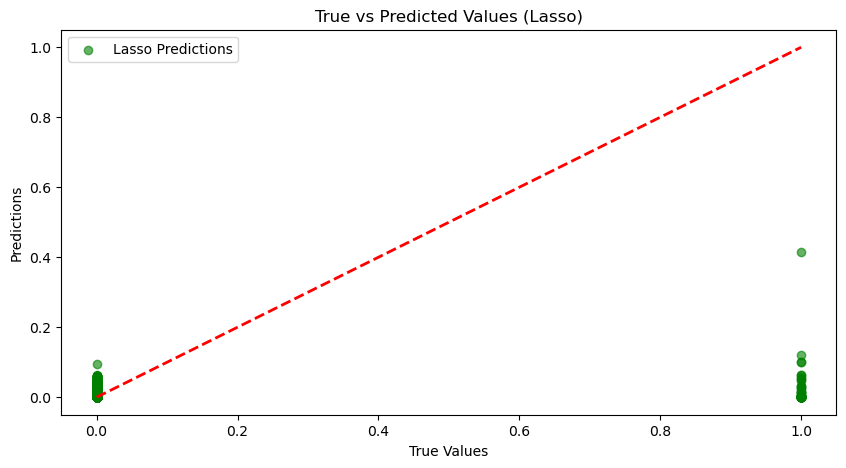

In [32]:
# applying linear regression

# Regularized Linear Regression (Lasso )
lasso_model = Lasso(alpha=0.01)

# Fit both models
lasso_model.fit(X_train_poly, y_train)

# Predict on test data
y_pred_lasso = lasso_model.predict(X_test_poly)

# Evaluate the models (Lasso)
lasso_mse = mean_squared_error(y_test, y_pred_lasso)
lasso_r2 = r2_score(y_test, y_pred_lasso)
print(f"Lasso MSE: {lasso_mse}, Lasso R2: {lasso_r2}")

# Visualize the results
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_pred_lasso, color='green', label='Lasso Predictions', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.legend()
plt.title('True vs Predicted Values (Lasso)')
plt.show()
